In [1]:
%matplotlib qt

In [2]:
import pathlib
import matplotlib
import matplotlib.pyplot as plt
import mne_bids
import mne

matplotlib.use('Qt5Agg')
mne.set_log_level('warning')

In [3]:
bids_root = pathlib.Path('out_data/sample_BIDS')

bids_path = mne_bids.BIDSPath(subject='01',
                              session='01',
                              task='audiovisual',
                              run='01',
                              datatype='meg',
                              root=bids_root)

raw = mne_bids.read_raw_bids(bids_path)
raw.load_data()
raw.filter(l_freq=0.1, h_freq=40)
events, event_id = mne.events_from_annotations(raw)

tmin = -0.200
tmax = 0.500
baseline = (None, 0)

epochs = mne.Epochs(raw,
                    events=events,
                    event_id=event_id,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline,
                    preload=True,
                    proj=False)


C:\Users\Dell\AppData\Local\Temp\ipykernel_16552\692287002.py:10: RuntimeWarning: The unit for channel(s) STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, STI 015, STI 016 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path)


In [4]:
epochs.save(pathlib.Path('out_data') / 'epochs_for_source_epo.fif',overwrite=True)
epochs.info

<Info | 22 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_results: 1 item (list)
 line_freq: 60.0
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: mne_anonymize
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
 subject_info: 3 items (dict)
>

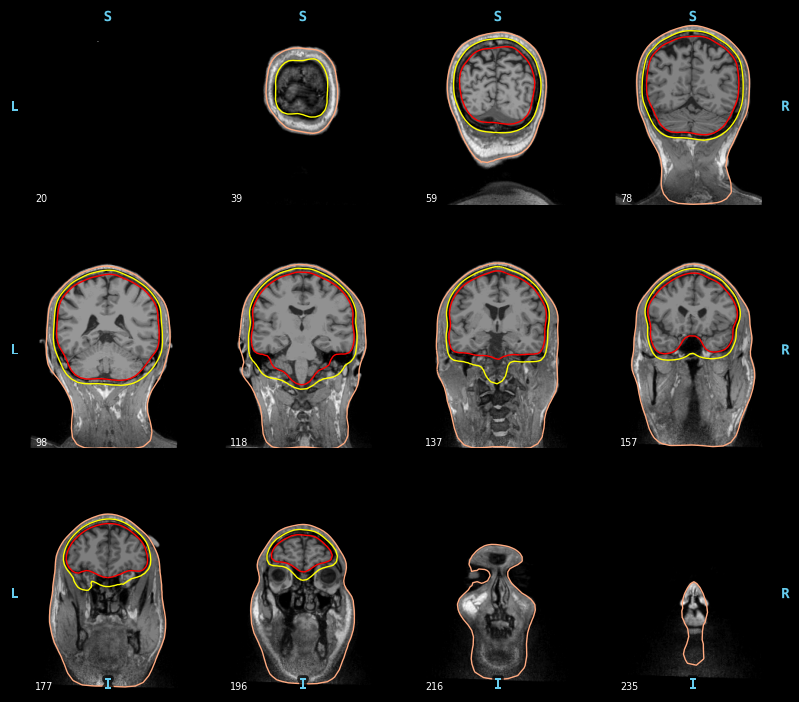

In [5]:
subjects_dir = pathlib.Path(mne.datasets.sample.data_path()) / 'subjects'
#gray matter, white matter, bone locations
mne.viz.plot_bem(subject='sample', subjects_dir=subjects_dir,
                 orientation='coronal')

In [10]:
from mne.forward import read_forward_solution
from mne.minimum_norm import (make_inverse_operator, apply_inverse,
                              write_inverse_operator)

In [11]:
fwd_fname = os.path.join(data_path,
    'derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01-meg-fwd.fif')
fwd = mne.read_forward_solution(fwd_fname)
fwd = mne.convert_forward_solution(fwd, surf_ori=True)

# Restrict forward solution as necessary for MEG
fwd = mne.pick_types_forward(fwd, meg=True, eeg=False)

# make an M/EEG, MEG-only, and EEG-only inverse operator
info = contrast.info
inverse_operator = make_inverse_operator(info, fwd, noise_cov,
                                         loose=0.2, depth=0.8)

NameError: name 'os' is not defined

In [15]:
method = "dSPM"
snr = 3.
lambda2 = 1. / snr ** 2
stc = apply_inverse(epochs['Auditory/Left'], inverse_operator, lambda2, method=method, pick_ori=None)

NameError: name 'inverse_operator' is not defined

In [16]:
brain = stc.plot(surface='inflated',
                 hemi='both',
                 subjects_dir=subjects_dir,
                 time_viewer=True)

NameError: name 'stc' is not defined